# UNICORN Companies - IST652

<p>Mini Project 1: Structured Data <br> IST652 - Scripting for Data Analysis </p>

<p>Submitted by: Somia Abdelrahman</p>

## Introduction

<p>
A unicorn company, or unicorn startup, is a private company with a valuation over <b>$1 billion</b>. As of March 2022, there are 1,000 unicorns around the world. Popular former unicorns include Airbnb, Facebook and Google.</p>

![alt text](unicorn2.png "Title")

### The aim of this notebook is to answer below questions:

- <p>What is the average funding and number of the unicorns in each industry/country ? Goal to see what industry is more profitable in each country.</p>

- <p>What is the average Return on Investment(ROI) and Time to be unicorn per industry?</p>

### Definitions:

<p> Return on investment (ROI) is an approximate measure of an investment's profitability. ROI is calculated by subtracting the initial cost of the investment from its final value, then dividing this new number by the cost of the investment, and finally, multiplying it by 100 </p>

<p> Time to be unicorn, is the time it takes a company since it starts to become a unicorn(difference between year founded and year joined the unicorn club) </p>

## Data Cleaning and preprocessing:

#### Read in the data:
- <i>Unicorn_Companies.csv</i>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
root = ''
filePath = root + "Unicorn_Companies.csv"

In [4]:
Ucompanies = pd.read_csv(filePath, sep = ',') #dataframe that contains the unicorns data, each row represent one company

In [5]:
Ucompanies.shape

(1074, 10)

In [6]:
Ucompanies.head() #Get a glimpse of the data 

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [7]:
Ucompanies.dtypes #Get Glimpse of data types

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [8]:
# To do list, cleaning:
#[1] Check for null and missing values
#[2] Type change, Valuation, funding to be float instead of object/string $10M. Date joined and Year founded to be int or date.
#[3] extract the year from the Date joined date column instead of the full date
#[4] Create the ROI column and time_to_be_unicorn
#[5] Check if data is correct and makes senese

In [9]:
#[1] Check for null and missing values
Ucompanies.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [10]:
#We can see that only the City and Select Investors columns have null values, but since we will not do any analysis on them we
#we leave them the way they are 

In [11]:
#[2] Type change, Valuation, funding to be float instead of object/string $10M->10,000,000. 
#Date joined and Year founded to be date.

In [12]:
def item_replace(c):
    """This function takes a string (xstr) and removes the first and last element of it, $ and M/B"""
    if type(c) == str:
        if c[-1] == 'n':
            return 'NaN'
        elif c[-1] == 'M':
            y = c[1:-1]+ '000000'
            return y 
        else:
            y = c[1:-1]+ '000000000'
            return y
    else: 
        print("This is not a string")

In [13]:
Ucompanies['Valuation in Dollars'] = Ucompanies.apply(lambda x: item_replace(x['Valuation']), axis=1)

In [14]:
Ucompanies.head() #New Column has been added to dataframe with zeros instead of M/B

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180000000000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100000000000
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100000000000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95000000000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46000000000


In [15]:
Ucompanies['Funding in Dollars'] = Ucompanies.apply(lambda x: item_replace(x['Funding']), axis=1)

In [16]:
Ucompanies.head() #New Column has been added to dataframe with zeros instead of M/B

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180000000000,8000000000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100000000000,7000000000
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100000000000,2000000000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95000000000,2000000000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46000000000,4000000000


In [17]:
Ucompanies['Valuation in Dollars'] = Ucompanies['Valuation in Dollars'].astype('float') 
Ucompanies['Funding in Dollars'] = Ucompanies['Funding in Dollars'].astype('float')
#Change the type of the two columns above to be float instead of str so we can do anlysis on them

In [18]:
Ucompanies.dtypes

Company                  object
Valuation                object
Date Joined              object
Industry                 object
City                     object
Country                  object
Continent                object
Year Founded              int64
Funding                  object
Select Investors         object
Valuation in Dollars    float64
Funding in Dollars      float64
dtype: object

In [19]:
#Date joined and Year founded to be date.

In [20]:
from datetime import datetime, timedelta
def year_extracte(c):
    """This function extracts the year from date str, eg.2022-10-22"""
    if type(c) == str:
            return datetime(year=int(c[0:4]), month = int(c[5:7]), day = int(c[8:10]))
    else: 
        print("This is not a string")

In [21]:
Ucompanies['Year Joined'] = Ucompanies.apply(lambda x: year_extracte(x['Date Joined']), axis=1)

In [22]:
Ucompanies['Year Joined'] = pd.DatetimeIndex(Ucompanies['Year Joined']).year  

In [23]:
Ucompanies.dtypes

Company                  object
Valuation                object
Date Joined              object
Industry                 object
City                     object
Country                  object
Continent                object
Year Founded              int64
Funding                  object
Select Investors         object
Valuation in Dollars    float64
Funding in Dollars      float64
Year Joined               int64
dtype: object

In [24]:
#[4] Create the ROI and time_to_be_unicorn Colunms

In [25]:
Ucompanies['ROI'] = 100*((Ucompanies['Valuation in Dollars'] -Ucompanies['Funding in Dollars'] )/Ucompanies['Funding in Dollars'])

In [26]:
Ucompanies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09,2017,2150.000000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09,2012,1328.571429
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09,2018,4900.000000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09,2014,4650.000000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09,2011,1050.000000


In [27]:
Ucompanies['Time to be Unicorn'] = Ucompanies['Year Joined'] - Ucompanies['Year Founded'] 

In [28]:
Ucompanies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI,Time to be Unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09,2017,2150.000000,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09,2012,1328.571429,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09,2018,4900.000000,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09,2014,4650.000000,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09,2011,1050.000000,6


In [29]:
#[5] Check if data is correct and makes senese

In [30]:
Ucompanies[Ucompanies['Time to be Unicorn'] < 0] 

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI,Time to be Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",1.000000e+09,151000000.0,2017,562.251656,-4


In [31]:
#There is one company with apparently wrong entry as the Year founded is bigger than the year it joined the unicorn
#Look it up in internet, correct founding date is 2013

In [32]:
Ucompanies.loc[714, 'Year Founded'] = 2013 #Replace 2021 by 2013

In [33]:
Ucompanies['Time to be Unicorn'] = Ucompanies['Year Joined'] - Ucompanies['Year Founded'] 
len(Ucompanies[Ucompanies['Time to be Unicorn'] < 0]) #No value return, problem solved

0

In [34]:
#Other problem with industry data: Artificial intellegence and Artificial Intellegence were two different industry

In [35]:
Ucompanies['Industry'].sort_values().unique()

array(['Artificial Intelligence', 'Artificial intelligence',
       'Auto & transportation', 'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

In [36]:
Ucompanies.replace('Artificial intelligence','Artificial Intelligence', inplace=True) 

In [37]:
Ucompanies['Industry'].sort_values().unique()

array(['Artificial Intelligence', 'Auto & transportation',
       'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

In [38]:
Ucompanies.dropna(how='all') #drop if there is any complete null row

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI,Time to be Unicorn
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09,2017,2150.000000,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09,2012,1328.571429,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09,2018,4900.000000,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09,2014,4650.000000,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09,2011,1050.000000,6
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",4.000000e+10,5.720000e+08,2018,6893.006993,6
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",4.000000e+10,2.000000e+09,2019,1900.000000,7
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",3.900000e+10,3.000000e+09,2014,1200.000000,2
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,3.800000e+10,1.400000e+10,2017,171.428571,2
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",3.800000e+10,3.000000e+09,2019,1166.666667,6


In [39]:
Ucompanies[Ucompanies['Company'] == 'Otto Bock HealthCare'] #inf ROI since the Funding was 0 
#To ease the anlaysis we will replace inf by NAN

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI,Time to be Unicorn
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,4.000000e+09,0.0,2017,inf,98


In [40]:
Ucompanies.loc[189, 'ROI'] = float("nan")

In [41]:
Ucompanies[Ucompanies['Company'] == 'Otto Bock HealthCare']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation in Dollars,Funding in Dollars,Year Joined,ROI,Time to be Unicorn
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,4.000000e+09,0.0,2017,NaN,98


## Data Analysis:

<p>In th section analysis will be made to answer two main question:</p>

### 1- What is the average valuation, funding and number of the unicorn companies in each industry/country ? Goal to see what industry is more popular/profitable to invest in each country

In [42]:
#How many unicorn are there in each country

In [43]:
countryGroupcounts = Ucompanies.Country.value_counts()

In [44]:
countryGroupcounts

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Australia                 8
Mexico                    6
Hong Kong                 6
Indonesia                 6
Sweden                    6
Netherlands               6
Ireland                   5
Japan                     5
Switzerland               5
Finland                   4
Norway                    4
Spain                     3
Turkey                    3
United Arab Emirates      3
Belgium                   3
Vietnam                   2
South Africa              2
Denmark                   2
Chile                     2
Philippines               2
Estonia                   2
Thailand                  2
Austria                   2
Colombia                  2
Czech Republic      

In [45]:
#Industy/Country
countryIndustyGroupCount = Ucompanies.groupby(['Country'])['Industry'].value_counts()

In [46]:
countryIndustyGroupCount

Country               Industry                           
Argentina             Fintech                                  1
Australia             Internet software & services             5
                      Fintech                                  2
                      E-commerce & direct-to-consumer          1
Austria               Edtech                                   1
                      Fintech                                  1
Bahamas               Fintech                                  1
Belgium               Data management & analytics              1
                      Fintech                                  1
                      Internet software & services             1
Bermuda               Artificial Intelligence                  1
Brazil                E-commerce & direct-to-consumer          5
                      Fintech                                  5
                      Supply chain, logistics, & delivery      3
                      Artificial

In [47]:
countryIndustry = Ucompanies.groupby(['Country','Industry'])[['Valuation in Dollars','Funding in Dollars']].mean()

In [48]:
countryIndustry['Count of unicorns'] = countryIndustyGroupCount

In [49]:
countryIndustry

Valuation in Dollars  \
Country              Industry                                                    
Argentina            Fintech                                      2.000000e+09   
Australia            E-commerce & direct-to-consumer              1.000000e+09   
                     Fintech                                      4.500000e+09   
                     Internet software & services                 9.200000e+09   
Austria              Edtech                                       3.000000e+09   
                     Fintech                                      4.000000e+09   
Bahamas              Fintech                                      3.200000e+10   
Belgium              Data management & analytics                  5.000000e+09   
                     Fintech                                      1.000000e+09   
                     Internet software & services                 2.000000e+09   
Bermuda              Artificial Intelligence                      2.000000e+09   
Brazil               Artificial Intelligence                      1.000000e+09   
                     E-commerce & direct-to-consumer              2.800000e+09   
                     Fintech                                      2.800000e+09   
                     Mobile & telecommunications                  1.000000e+09   
                     Other                                        3.000000e+09   
                     Supply chain, logistics, & delivery          1.333333e+09   
Canada               Artificial Intelligence                      1.000000e+09   
                     Cybersecurity                                3.333333e+09   
                     E-commerce & direct-to-consumer              4.000000e+09   
                     Edtech                                       3.000000e+09   
                     Fintech                                      3.500000e+09   
                     Internet software & services                 1.800000e+09   
                     Other                                        1.000000e+09   
                     Supply chain, logistics, & delivery          1.000000e+09   
                     Travel                                       5.000000e+09   
Chile                Artificial Intelligence                      1.500000e+09   
China                Artificial Intelligence                      1.070000e+10   
                     Auto & transportation                        2.941176e+09   
                     Consumer & retail                            4.750000e+09   
...                                                                        ...   
United Arab Emirates Supply chain, logistics, & delivery          1.000000e+09   
United Kingdom       Artificial Intelligence                      1.666667e+09   
                     Auto & transportation                        2.000000e+09   
                     Consumer & retail                            2.000000e+09   
                     Data management & analytics                  2.000000e+09   
                     E-commerce & direct-to-consumer              1.000000e+09   
                     Fintech                                      5.653846e+09   
                     Hardware                                     1.100000e+10   
                     Health                                       3.000000e+09   
                     Internet software & services                 8.000000e+09   
                     Mobile & telecommunications                  1.000000e+09   
                     Other                                        2.500000e+09   
                     Supply chain, logistics, & delivery          2.000000e+09   
United States        Artificial Intelligence                      2.934783e+09   
                     Auto & transportation                        3.500000e+09   
                     Consumer & retail                            5.363636e+09   
                     Cybersecurity      

In [50]:
format_dict = {col_name: '${:,.2f}' for col_name in countryIndustry[['Valuation in Dollars','Funding in Dollars']]}
#This used to make the valuation and funding coloumn readable by formating the number and adding $ and , 

In [51]:
countryIndustry.style.format(format_dict)

### 2- What is the average ROI and Time to be Unicorns in each industry?

In [52]:
IndustryMetrics = Ucompanies.groupby(['Industry'])[['ROI','Time to be Unicorn']].mean()

In [53]:
IndustryMetrics.sort_values(by = 'ROI', ascending= False )

,ROI,Time to be Unicorn
Industry,,
Internet software & services,2774.171304,7.868293
Other,840.785540,7.775862
Mobile & telecommunications,838.925452,6.526316
Fintech,814.956010,6.544643
Hardware,702.556703,5.941176
Consumer & retail,700.409123,8.080000
Data management & analytics,580.726529,8.073171
Artificial Intelligence,540.950223,5.892857
Health,530.024617,8.189189


###### Exporting to a CSV

In [54]:
countryIndustry.to_csv('companyDF_grouped_CountryIndustry.csv')

In [55]:
IndustryMetrics.to_csv('companyDF_grouped_Industry.csv')

###### Some visualization (Extra)

(0, 4000)

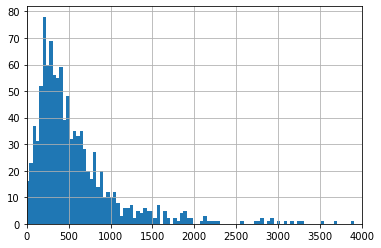

In [56]:
Ucompanies['ROI'].hist(bins =10000)
plt.xlim([0, 4000])

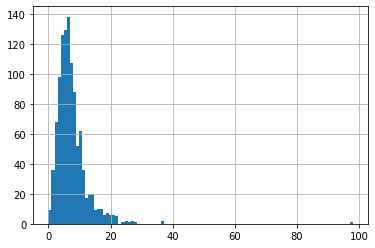

In [59]:
Ucompanies['Time to be Unicorn'].hist(bins = 100)